In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis import IDKickMap
from scipy.optimize import curve_fit
import sympy
import utils

In [69]:
vpu = utils.generate_radia_model(width=30, gap=9.7, phase=0)

In [28]:
def get_field_on_axis(vpu, rz, y, x, plot_flag=True):
    field = vpu.get_field(x, y, rz)
    bx = field[:, 0]
    by = field[:, 1]
    bz = field[:, 2]

    if plot_flag:
        plt.plot(rz, bx, label='Bx')
        plt.plot(rz, by, label='by')
        plt.plot(rz, bz, label='Bz')
        plt.xlabel('rz [mm]')
        plt.ylabel('Field [T]')
        plt.legend()
        plt.grid()
        plt.show()

    return bx, by, bz

In [36]:
def get_field_roll_off(vpu, ry, peak_idx, x=0, y=0, plot_flag=True):
    """."""
    period = vpu.period_length
    rz = np.linspace(-period/2, period/2, 100)
    field = vpu.get_field(0, 0, rz)
    bx = field[:, 0]
    bx_max_idx = np.argmax(bx)
    rz_at_max = rz[bx_max_idx] + peak_idx*period
    field = vpu.get_field(0, ry, rz_at_max)
    bx = field[:, 0]
    rx5_idx = np.argmin(np.abs(ry - 5))
    rx0_idx = np.argmin(np.abs(ry))
    roff = np.abs(bx[rx5_idx]/bx[rx0_idx]-1)
    print('roll off = ', 100*roff, '%')
    if plot_flag:
        plt.plot(ry, bx)
        plt.xlabel('y [mm]')
        plt.ylabel('Bx [T]')
        plt.title('Field rolloff at x = 5 mm')
        plt.grid()
        plt.show()

    return bx

In [13]:
rz = np.linspace(-150, 150, 801)
rx = np.linspace(-10, 10, 4*81)
ry = np.linspace(-3, 3, 25)

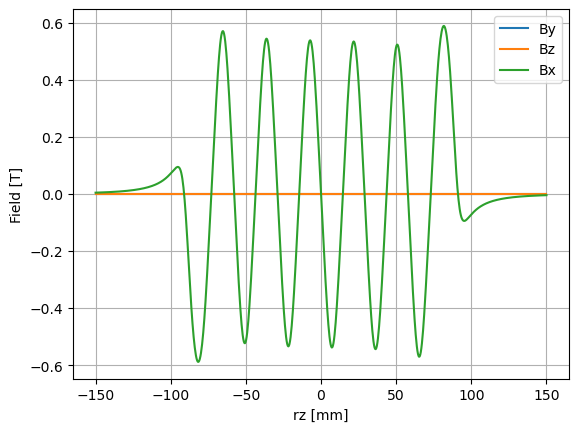

In [29]:
bx, by, bz = get_field_on_axis(vpu, rz, x=0, y=0, plot_flag=False)
plt.plot(rz, by, label='By')
plt.plot(rz, bz, label='Bz')
plt.plot(rz, bx, label='Bx')
plt.xlabel('rz [mm]')
plt.ylabel('Field [T]')
plt.legend()
plt.grid()
plt.show()


roll off =  1.652524325034932 %
0.5114230454354934
kx =  -0.06043572195966724
eta =  -3.4654919879850596


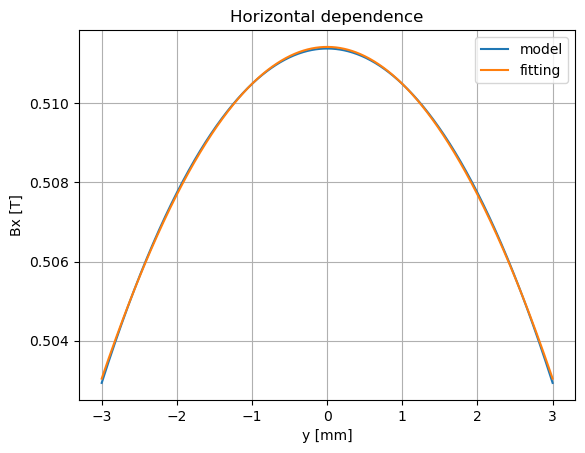

In [89]:
kxl = list()
phil = list()
def cos(x, b0, kx):
    b = b0*np.cos(kx*x)
    return b
ry = np.linspace(-3, 3, 1000)

bx = get_field_roll_off(vpu, ry, x=0, peak_idx=0, plot_flag=False)
opt = curve_fit(cos, ry, bx)[0]
print(opt[0])
print('kx = ', opt[1])
print('eta = ', 2*np.pi/(opt[1]*30))
b_fitted = cos(ry, opt[0], opt[1])
plt.plot(ry, bx, label='model')
plt.plot(ry, b_fitted, label='fitting')
plt.xlabel('y [mm]')
plt.ylabel('Bx [T]')
plt.title('Horizontal dependence')
plt.grid()
plt.legend()
    

0.06053165035818484


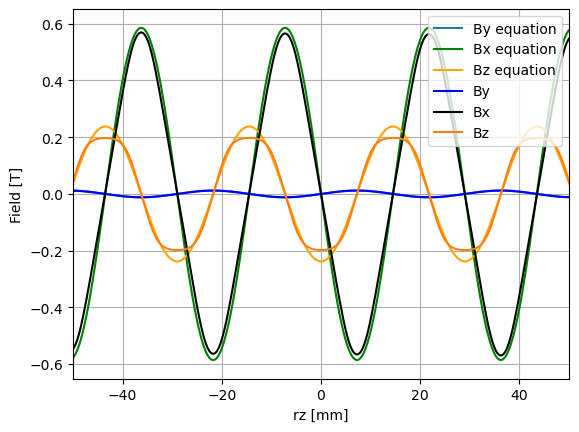

In [114]:
period = vpu.period_length
width = 30
eta = 3.46
dp=0
y=3
x=2
bx, by, bz = get_field_on_axis(vpu, rz, x=x, y=y, plot_flag=False)
b0 = 0.54
kz = 2*np.pi/period
ky = 2*np.pi/(eta*width)
print(ky)
kx = np.sqrt(ky**2+kz**2)
bx_eq = -b0*np.cos(ky*y)*np.cosh(kx*x)*np.sin(kz*rz)
by_eq = ky/kx*b0*np.sin(ky*y)*np.sinh(kx*x)*np.sin(kz*rz)
bz_eq = kz/kx*b0/2*np.cos(ky*y)*(np.exp(-kx*x)*np.cos(kz*rz)-np.exp(kx*x)*np.cos(kz*rz-kz*dp))

plt.plot(rz, by_eq, color='C0', label='By equation')
plt.plot(rz, bx_eq, color='g', label='Bx equation')
plt.plot(rz, bz_eq, color='orange', label='Bz equation')
plt.plot(rz, by, color='b', label='By')
plt.plot(rz, bx, color='k', label='Bx')
plt.plot(rz, bz, color='C1', label='Bz')
plt.xlabel('rz [mm]')
plt.ylabel('Field [T]')
plt.xlim(-50, 50)
plt.legend()
plt.grid()
plt.show()

In [115]:
b = 0.54
l = period*1e-3*5*10
R = 10
kz = 2*np.pi/(period*1e-3)
ky = ky*1e3
kx = kx*1e3
betax = 1.36
betay = 1.60
print('kx = ', kx)
print('kz = ', kz)
print('ky = ', ky)


a = (1/(kz**2))*l*(b**2)/(2*R**2)
coefx = -a*kx**2
coefy = a*ky*(ky**2/kx**2)**2


print('horizontal quadrupolar term: {:.5f}'.format(coefx))
print('vertical quadrupolar term: {:.5f}'.format(coefy))

dtunex = -l*coefx*betax/(4*np.pi)
dtuney = -l*coefy*betay/(4*np.pi)

print('horizontal delta tune: {:.5f}'.format(dtunex))
print('vertical delta tune: {:.5f}'.format(dtuney))




kx =  224.95847012399508
kz =  216.66156231653744
ky =  60.53165035818484
horizontal quadrupolar term: -0.00228
vertical quadrupolar term: 0.00000
horizontal delta tune: 0.00036
vertical delta tune: -0.00000
